# <center>Introduction to Data Science</center> 
### <center>Decision Tree Project 2</center>
### <center>Water Potability Classification</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Water is an essential part of any human being. Not all water accessible to humans are consumable. There are many factors that determine whether the water is safe for consumption. Many factors like the pH value and amount of different chemicals/minerals present in the water determines the potability of the water. Different region has different quality of water, and finding a right one can help yeild an economic benefit as well as health benefits. 

#### Objective
**Predicting whether the water quality is good for consumption based on different metrics of the water.**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Water Quality](https://www.kaggle.com/adityakadiwal/water-potability)

It has 10 fields and the description of each field of the dataset are: 
1. **pH value:** Evaluates the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO recommends a permissible limit of pH from 6.5 to 8.5. 

2. **Hardness:** Hardness defines the capacity of water to precipitate soap caused by Calcium and Magnesium. It is mainly caused by calcium and magnesium salts which are dissolved from geologic deposits. 

3. **Solids (Total dissolved solids - TDS):** It indicates the ability to dissolve a wide range of inorganic and some organic minerals or salts. These minerals produce unwanted taste and diluted color in appearance of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is between 500 mg/l and 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:** Determines the amount of Chlorine and chloramine which are used as disinfectants in public water systems. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe for drinking water.

5. **Sulfate:** Indicates the amount of Sulfates in the water. They are naturally occurring substances that are found in minerals, soil, and rocks. 

6. **Conductivity:** Indicates the ionic conductivity of the water. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. Pure water is not a good conductor of electric current rather it is a good insulator. The amount of dissolved solids in water determines the electrical conductivity. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:** Total Organic Carbon (TOC) measures the total amount of carbon in organic compounds in pure water. It comes from decaying natural organic matter (NOM) as well as synthetic sources. 

8. **Trihalomethanes:** Trihalomethanes (THMs) are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:** It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU. It depends on the quantity of solid matter present in the suspended state. 

10. **Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Describing the size, shape and dimension of the dataset.
water_data = pd.read_csv('water_potability.csv') 
print("The total size of the dataset is {} bytes.".format(water_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(water_data.shape[0], water_data.shape[1], water_data.shape))
print("The dataset has a {} dimensional structure.".format(water_data.ndim))

The total size of the dataset is 32760 bytes.
There are 3276 number of records and 10 number of fields with a (3276, 10) shape.
The dataset has a 2 dimensional structure.


In [3]:
print("The top 5 records of the dataset are: \n{}".format(water_data.head()))

The top 5 records of the dataset are: 
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [4]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(water_data.dtypes))

The datatype of the dataset are: 
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [5]:
#Statistical description of the data
print(water_data.describe().T)

                  count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  

From the above statistics, we can see that there are certain values missing for ph, sulphate and trihalomethanes. 
The metrics min-max ranges widely from each other, thus scalability/normalization of the data is required. 
Few of the metrics looks to display skewness in the data. 

We will be removing all instances that has NaN values in it. 

In [6]:
#Deleting all the rows with NaN values
water_data = water_data.dropna()

print("Now, the number of rows has been reduced to {} rows and the new shape is {}".format(water_data.shape[0], water_data.shape))

print("The new data looks likes this: \n{}".format(water_data.describe().T))

Now, the number of rows has been reduced to 2011 rows and the new shape is (2011, 10)
The new data looks likes this: 
                  count          mean          std         min           25%  \
ph               2011.0      7.085990     1.573337    0.227499      6.089723   
Hardness         2011.0    195.968072    32.635085   73.492234    176.744938   
Solids           2011.0  21917.441374  8642.239815  320.942611  15615.665390   
Chloramines      2011.0      7.134338     1.584820    1.390871      6.138895   
Sulfate          2011.0    333.224672    41.205172  129.000000    307.632511   
Conductivity     2011.0    426.526409    80.712572  201.619737    366.680307   
Organic_carbon   2011.0     14.357709     3.324959    2.200000     12.124105   
Trihalomethanes  2011.0     66.400859    16.077109    8.577013     55.952664   
Turbidity        2011.0      3.969729     0.780346    1.450000      3.442915   
Potability       2011.0      0.403282     0.490678    0.000000      0.000000   

 

### Statistical Numerical and Graphical Summaries

In [7]:
print("Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. \n")

for data_keys in water_data.keys():
      skewness = water_data[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. 

ph is Right Skewed
Hardness is Left Skewed
Solids is Right Skewed
Chloramines is Right Skewed
Sulfate is Left Skewed
Conductivity is Right Skewed
Organic_carbon is Left Skewed
Trihalomethanes is Left Skewed
Turbidity is Left Skewed
Potability is Right Skewed


We can further modify the graph using the pairplot to determine what data fall under Potable or Not Potable


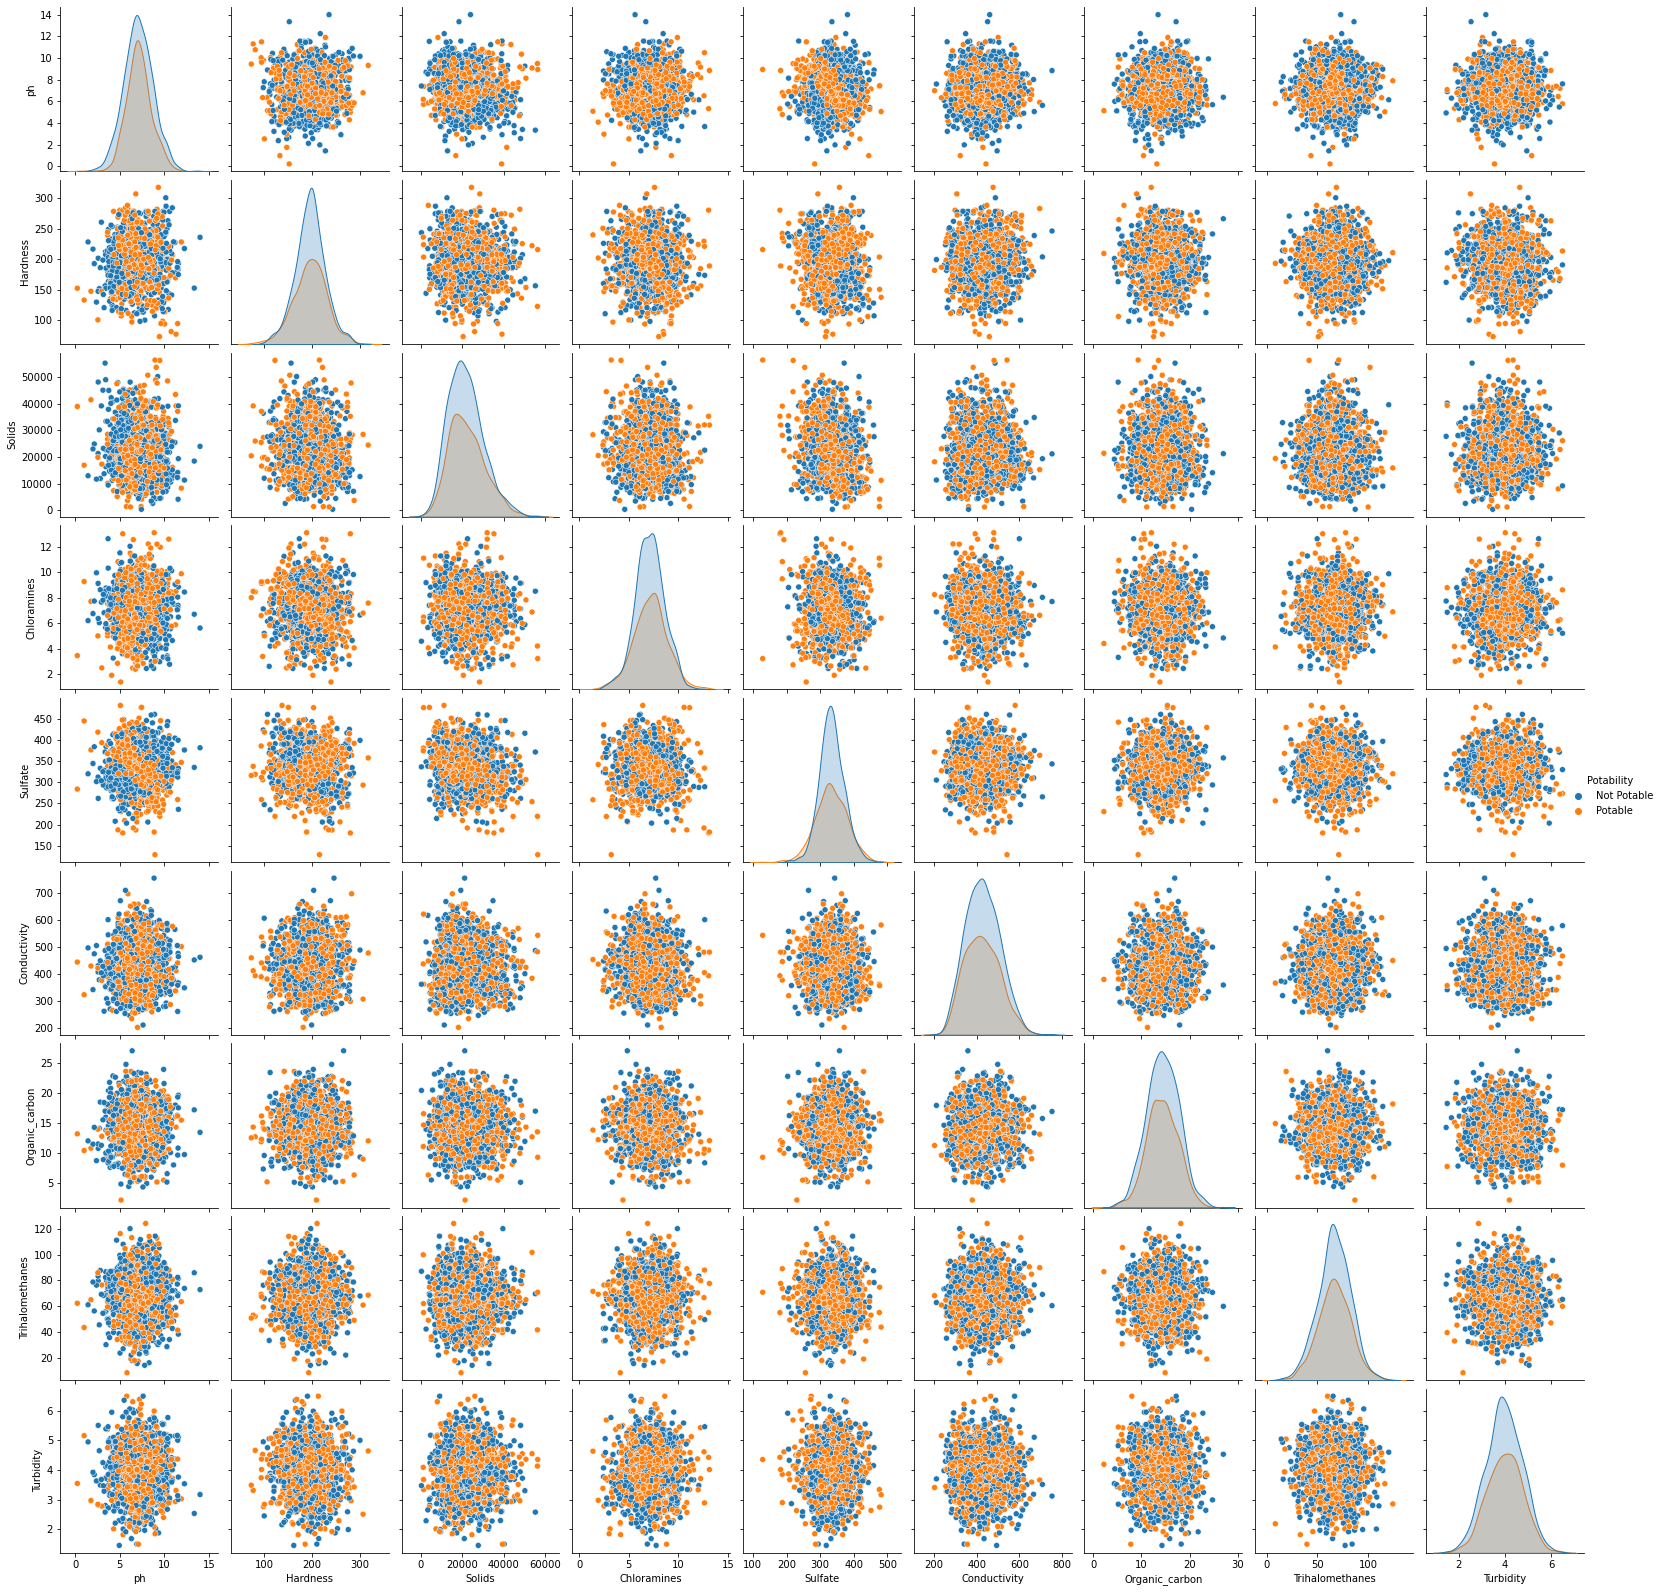

In [27]:
#plotting pairplot to see how the data are scattered based on the target variable
print("We can further modify the graph using the pairplot to determine what data fall under Potable or Not Potable")

_sns_pairplot_data = sns.pairplot(water_data, hue='Potability')

#Updating the legend label for ease. 
new_labels = ['Not Potable', 'Potable']
for t, l in zip(_sns_pairplot_data._legend.texts, new_labels): 
    t.set_text(l)

In the graph above, the blue dots/area denotes the water quality as "Not Potable" where as orange marks the quality as "Potable". 
We can see there are outliers present in the graphs. <br/>
Looking at the graph, we can identify hardness, solids, chloramines, sulfate, conductivity and turbidity metrics might be sufficed to determine the quality of the water. <br/>
However, it is quite difficult to say which metrics factors more as we can see that both the type of water are dispersed evenly in the scatter plot. 
We can also see that the data is underfitting as orange dots (Potable) outcomes can be seen dominating the blue dots (Not Potable).

### Algorithm Implementation and Statistical Tests 

Implementing the Decision Tree algorithm to predict the classification of the water quality. <br/>

In [9]:
#Selecting all the predictor variables and target variables for the algorithm. 
pred_var = water_data.iloc[:, 0:9]
targ_var = water_data['Potability']

#Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25, random_state=0)

#We know the data for the predictor variables are not under the same ranges, thus scaling/normalization is required.
#Also, we saw that most of the fields are skewed with some outliers. 
#Thus we will be using the Min Max Normalization process to normalize the data across all the fields.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 
#The max_depth of the tree is not defined, thus allowing the tree to be expanded to all the leaf nodes.
tree = DecisionTreeClassifier(criterion="entropy", max_features="sqrt", random_state=1)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

print("\nThe depth of the tree is {}".format(tree.get_depth()))

The accuracy of the training set is 1.0
The accuracy of the testing set is 0.6123260437375746

The depth of the tree is 32


In [10]:
#Creating the classification report for the above prediction. 
predictions = tree.predict(X_test)

print("The classification report is as follows: \n{}".format(classification_report(y_test, predictions)))

The classification report is as follows: 
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       309
           1       0.50      0.49      0.49       194

    accuracy                           0.61       503
   macro avg       0.59      0.59      0.59       503
weighted avg       0.61      0.61      0.61       503



From the classification report we can see that the sensitivity for correctly predicting outpatient is more than the sensitivity of predicting inpatient care. However, the precision is really low. 

Comparing with the result obtained from the K-NN algorithm, the accuracy is low as well as the sensitivity score too. Thus, we can see that the model created here by the decision tree is overfitting and accuracy is lower. 

In [11]:
#Plotting the confusion matrix to see how many predictions were predicted correctly.
matrix_data = pd.DataFrame(confusion_matrix(y_test, predictions), index=['F', 'T'], columns=['F', 'T'])

print("The confusion matrix is as follows \n{}\n".format(matrix_data))

The confusion matrix is as follows 
     F   T
F  213  96
T   99  95



The confusion matrix shows us that the false positive and false negative are high as compared to the result from the K-NN algorithm. This justifies the lower accuracy. The prediction are not accurate enough and the data looks to have lots of noise in it. 

In [12]:
#Printing the AUROC curve to see how well the categories are seperated. 
print("The AUROC value is: {}".format(roc_auc_score(y_test, predictions)))

The AUROC value is: 0.5895055549994995


The AUROC value of 0.589 shows that better seperability is not obtained from the classifier with default hyperparameters.

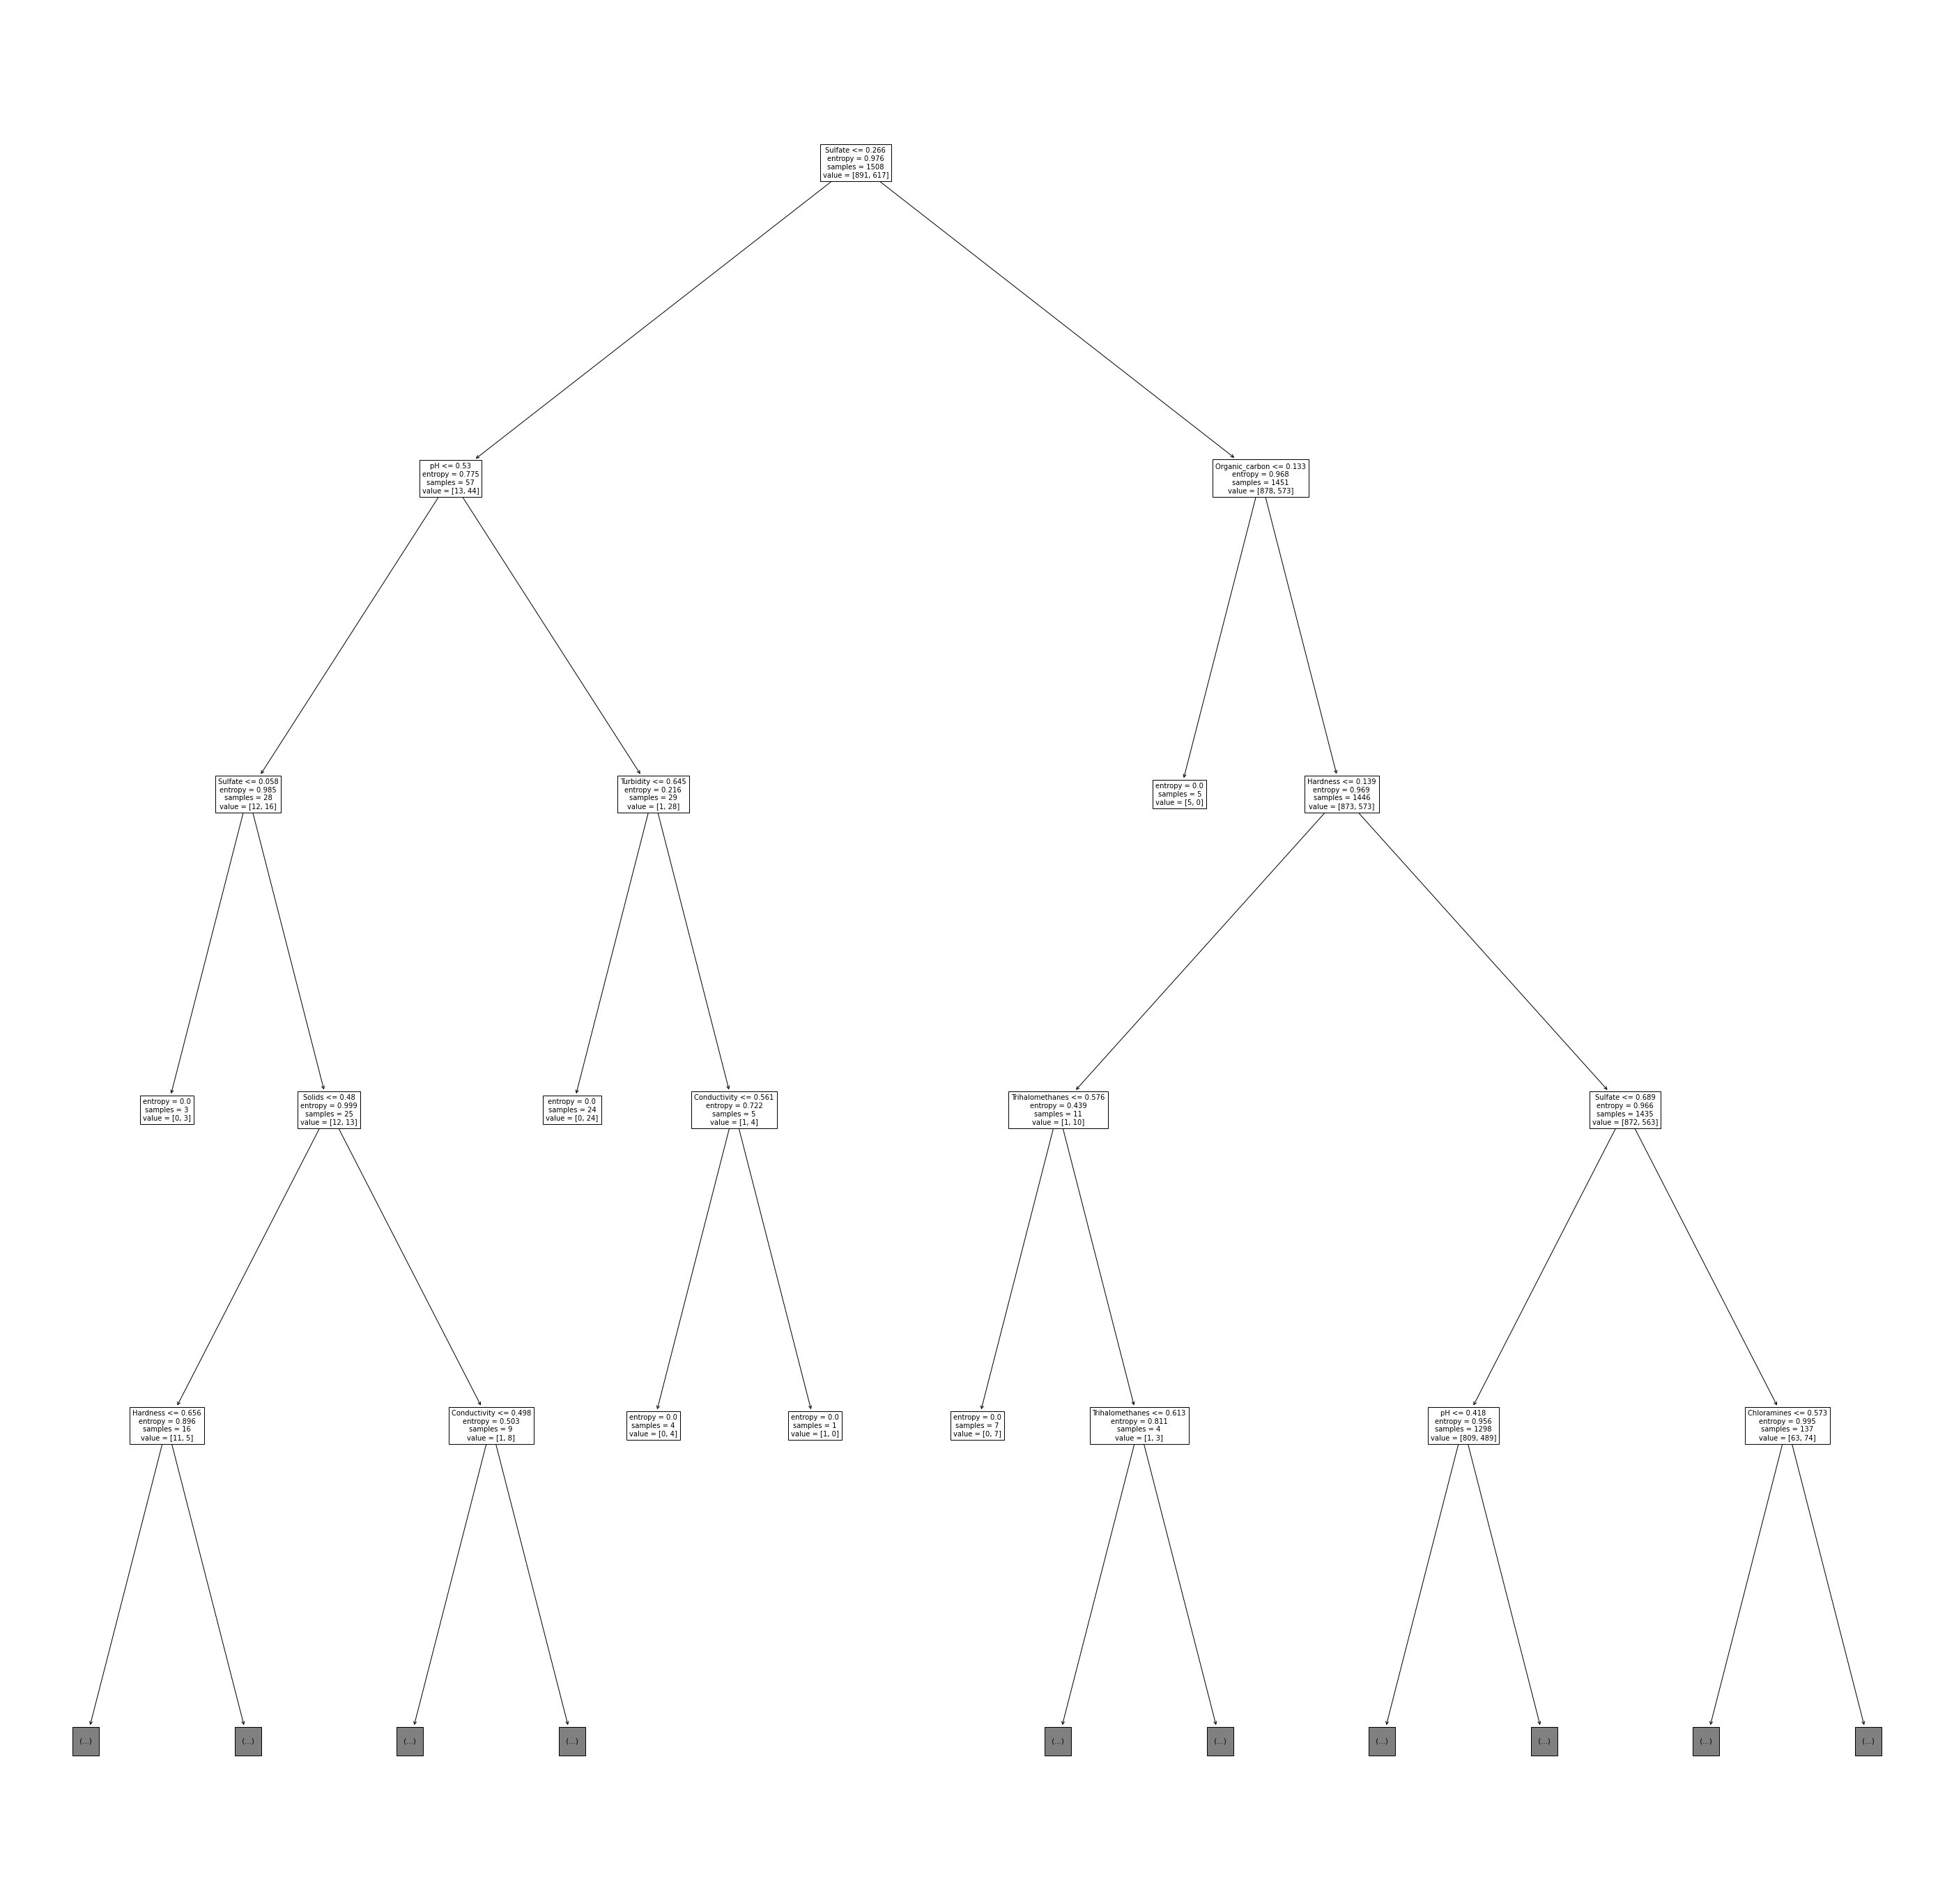

In [13]:
#Displaying the tree for depth as 4
plt.figure(figsize=(50,50))
tree_diagram = plot_tree(tree, max_depth=4, fontsize=10,
        feature_names=["pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"])
plt.show()

The above tree diagram shows that, most of the nodes have high entropy value which means purity is not obtained from the feature. Along with it, the information gain is not high for much of the nodes, which describes that the split did not reduce the entropy. 

### Performance Improvement

Max train score 100.0 % with depth of [30, 32]
Max test score 66.40159045725646 % with depth of [5, 12]


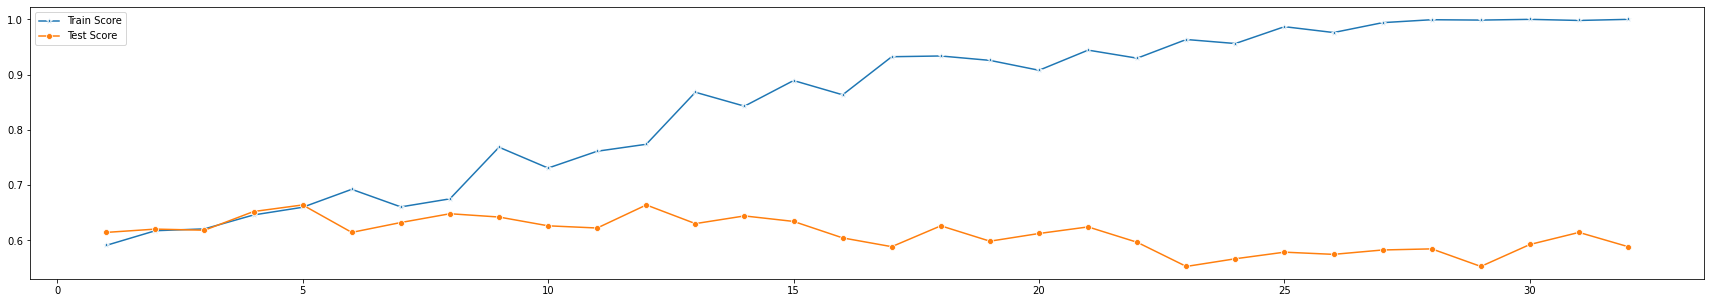

In [14]:
#When we consider to create a tree with the maximum depth, i.e. the depth of the tree is extensive, 
#and the data tends to overfit.
#Taking different values for max_depth to see which value for max_depth gives us better performance.

train_accuracy_score=[]
test_accuracy_score=[]

#Taking range from 1,33 as the max depth obtained from the inital run was 32. 
for i in range(1,33): 
    classifier = DecisionTreeClassifier(criterion="entropy", max_features="auto", max_depth=i)
    classifier.fit(X_train, y_train)
    train_accuracy_score.append(classifier.score(X_train, y_train))
    test_accuracy_score.append(classifier.score(X_test, y_test))
    
max_train_score = max(train_accuracy_score)
train_scores_ind = [i for i, v in enumerate(train_accuracy_score) if v == max_train_score]
print('Max train score {} % with depth of {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_accuracy_score)
test_scores_ind = [i for i, v in enumerate(test_accuracy_score) if v == max_test_score]
print('Max test score {} % with depth of {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation
plt.figure(figsize=(30,5))
p = sns.lineplot(range(1,33),train_accuracy_score,marker='*',label='Train Score')
p = sns.lineplot(range(1,33),test_accuracy_score,marker='o',label='Test Score')

Here, we can see that the max training score is 100% with depth of 30 and 32. This is because the data is overfitting when the decision tree uses the max depth possible. 
However, we can see that with depth of 5 and 12, it has the test score of 66% which is slighlty higher than the previous prediction score. 
But, the optimal depth of the tree looks to be 7 as the accuracy of train set and test set is near which means the training set is not overfitting.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

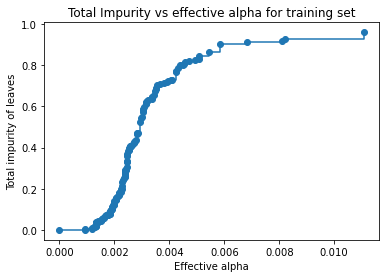

In [15]:
#Another way of optimizing the performance of the algorithm is by pruning.
#Pruning can be done by using the cost_complexity_pruning_path function of the DecisionTreeClassifier.
#Finding the ccp_alpha value to prune the decision tree to obtain optimal value.

classifier = DecisionTreeClassifier(criterion="entropy", max_features="auto", random_state=10)
pruning = classifier.cost_complexity_pruning_path(X_train, y_train)

#The cost_complexity_pruning_path function returns the alphas and the impurities of the subtree level for the 
#corresonding alpha value. 
pruning_alphas, pruning_impurities = pruning.ccp_alphas, pruning.impurities

#Removing the maximum effective alpha as it contains an implementation of one node. 
fig, ax = plt.subplots()
ax.plot(pruning_alphas[:-1], pruning_impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Here, we can see that with the increase in the alpha value, more of the tree is pruned, which increases the impurity of a leaf. Thus, the highest alpha value has only one node in the tree. 

In [16]:
#Obtaining all the decision trees with different alpha values and storing in the trees variable. 
trees = []
for pruning_alpha in pruning_alphas:
    classifier = DecisionTreeClassifier(ccp_alpha=pruning_alpha)
    classifier.fit(X_train, y_train)
    trees.append(classifier)
    
print("Number of nodes in the last tree is {} with pruning alpha {}".format(
      trees[-1].tree_.node_count, pruning_alphas[-1]))

Number of nodes in the last tree is 1 with pruning alpha 0.015468388564530589


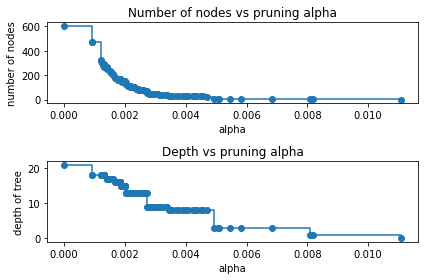

In [17]:
#Removing the last tree as it has only one node. As mentioned above, the tree with highest alpha contains 
#only one node. 
trees = trees[:-1]
pruning_alphas = pruning_alphas[:-1]

#Collecting the number of nodes and depths for each ccp_alpha value.
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]

#Plotting number of nodes vs the pruning alpha value.
fig, ax = plt.subplots(2, 1)
ax[0].plot(pruning_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs pruning alpha")

#Plotting the depth of the tree against the ccp_alpha value. 
ax[1].plot(pruning_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs pruning alpha")
fig.tight_layout()

We can see that the number of nodes decreases with value of alpha increases as mentioned earlier. Similarly, the depth of the tree decreases as lesser the depth of tree, lower the number of nodes are present. 

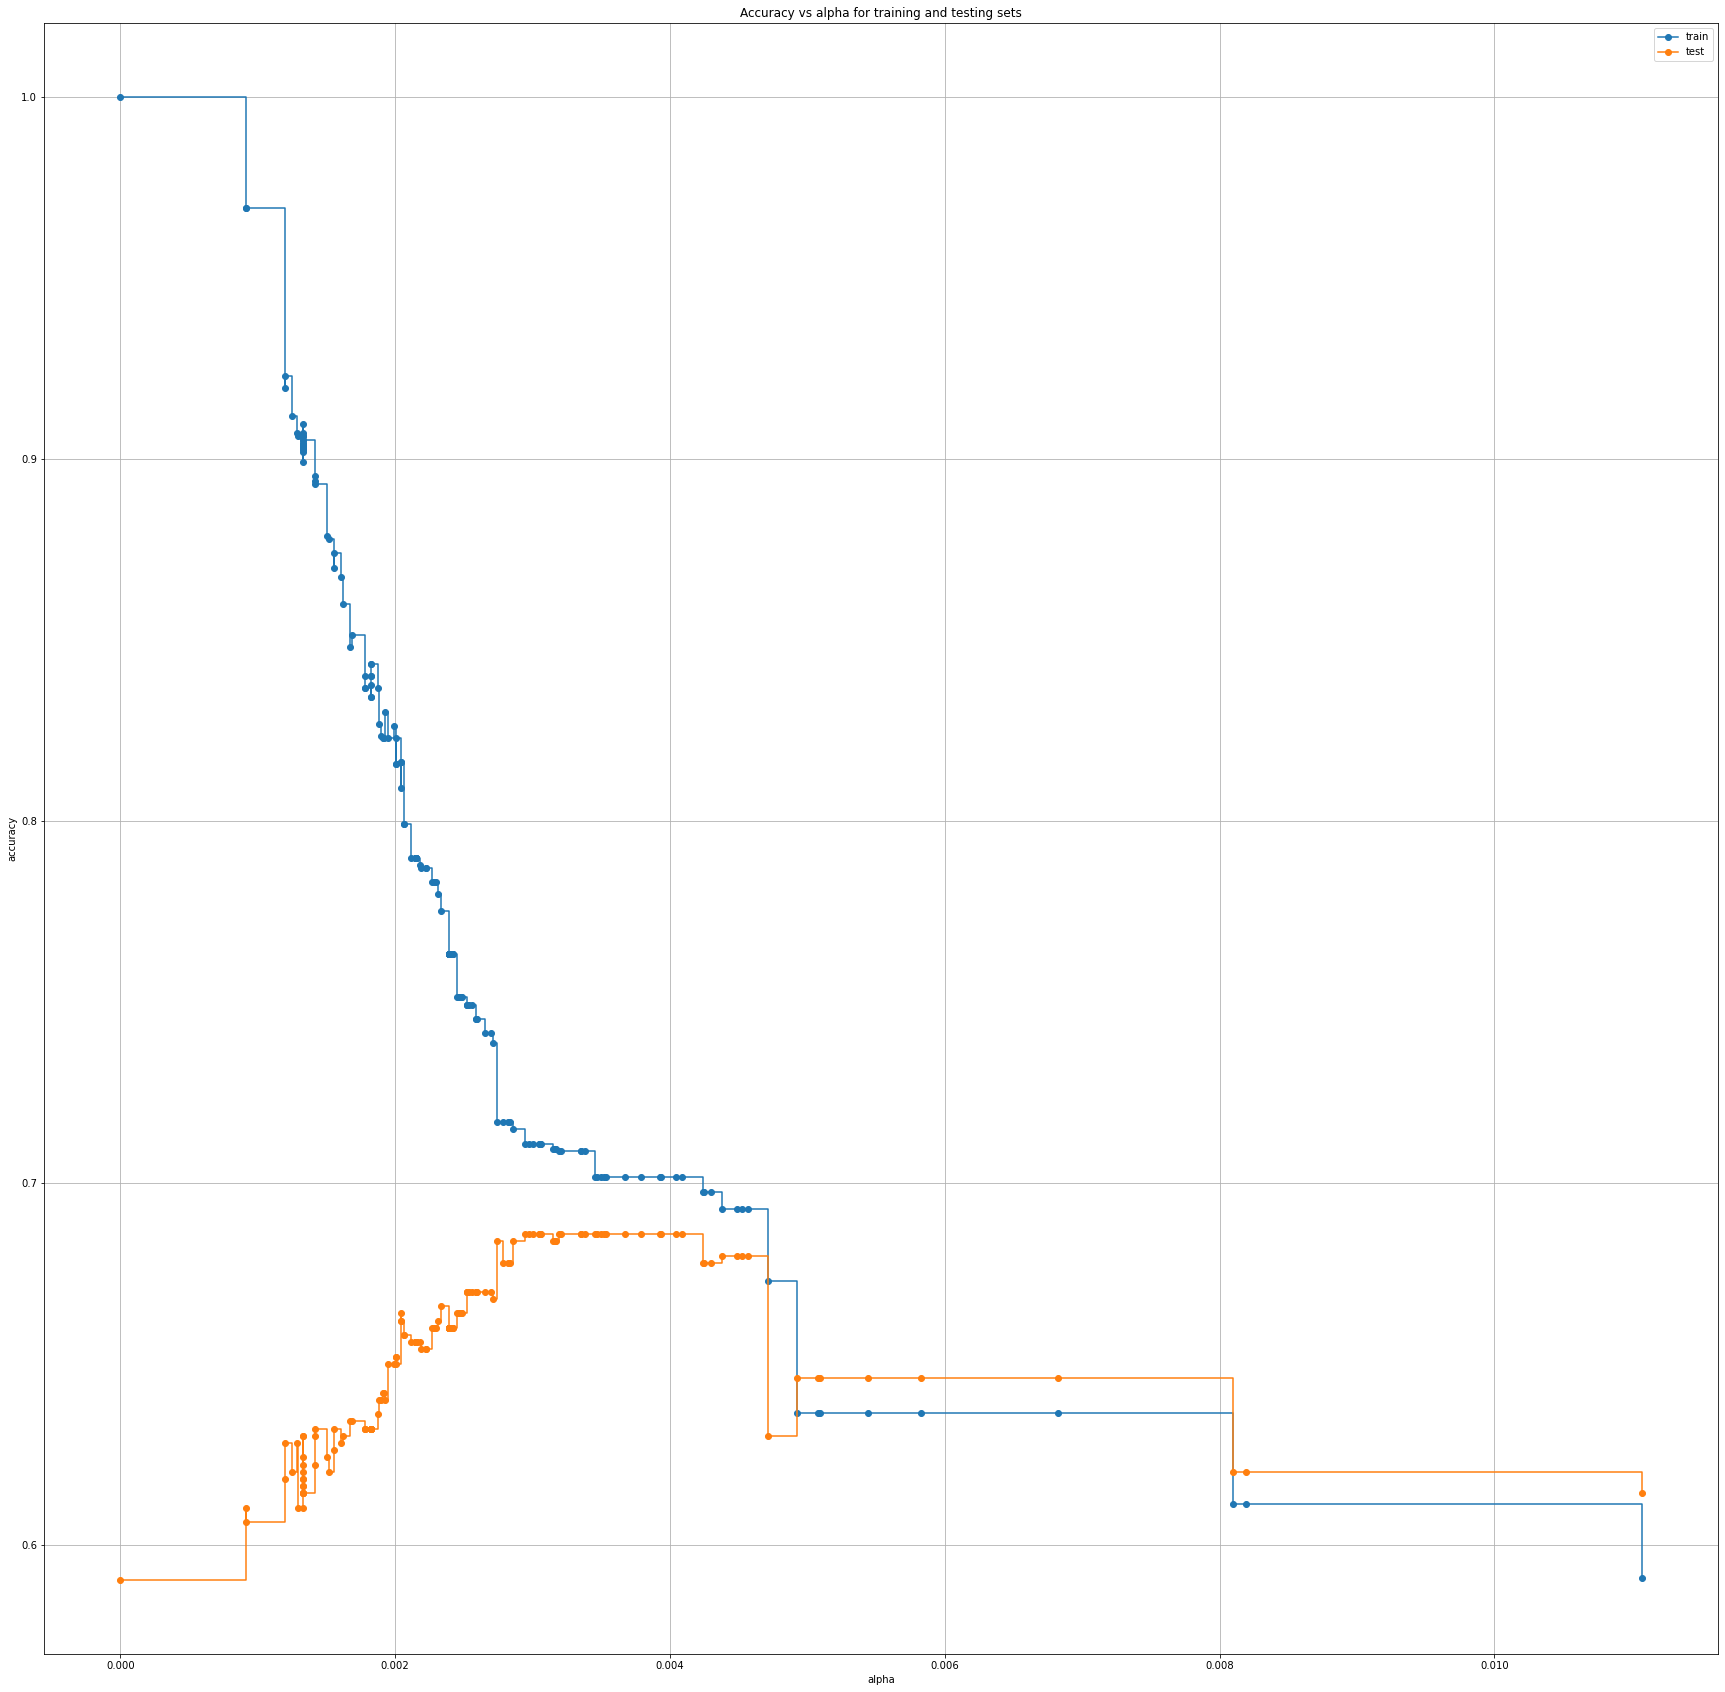

In [18]:
#Now plotting the train-test evaluation to figure out the better ccp_alpha value for the algorithm. 
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

fig, ax = plt.subplots(figsize=(30,30))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(pruning_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(pruning_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

From the above chart we can see that with alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. Here, we can see that with ccp_alpha value somewhere with the range of 0.003 and 0.004 which gives us the better testing score and training score. For, ccp_alpha betwee 0.003 and 0.004 the accuracy on test set is high as well as for the training set. 

For the project we will consider ccp_alpha as 0.003.

In [28]:
#Selecting all the predictor variables and target variables for the algorithm, with CCP_ALPHA = 0.003 as 
#obtained above
pred_var = water_data.iloc[:, 0:9]
targ_var = water_data['Potability']

# #Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25, random_state=14)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", ccp_alpha=0.003, random_state=14)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

print("\nThe depth of the tree is {}".format(tree.get_depth()))

The accuracy of the training set is 0.8229442970822282
The accuracy of the testing set is 0.6262425447316103

The depth of the tree is 23


In [29]:
#Selecting all the predictor variables and target variables for the algorithm, with max_depth = 7 as obtained above
#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 

tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", max_depth=7, random_state=15)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

The accuracy of the training set is 0.7281167108753316
The accuracy of the testing set is 0.6381709741550696


From the above two implementation we can see that the accuracy for the testing score is at 63%, while the training set accuracy is higher at 73% when max depth of 7 is provided to the classifier.

Taking both the ccp_alpha as 0.003 and max_depth as 7 we get the following results:

In [30]:
#Selecting the predictor variables and target variables for the algorithm, with max_depth = 7 and ccp_alpha = 0.003
#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 
#The max_depth of the tree is not defined, thus allowing the tree to be expanded to all the leaf nodes.
tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", max_depth=7, ccp_alpha=0.003,
                             random_state=11)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

The accuracy of the training set is 0.7141909814323607
The accuracy of the testing set is 0.6640159045725647


We can see that the accuracy for the testing set has increased and training set is decreased as compared to the inital implementation with default hyperparameters. The training set is no longer overfitted as before but high accuracy is not being obtained by using the max depth size of 7 and ccp alpha value as 0.003.

In [31]:
#When using all the features it did not provide us with an efficient accuracy. 
#Thus to try and get better results, we will find the important features that helps in determining 
#the accuracy efficiently. 

#Defining a function to create feature importance based on the model used. 
def find_feature_importance(model):
    feature_scores = pd.Series(model.feature_importances_, index=pred_var.columns).sort_values(ascending=False)

    print("The feature importance scores obtained are: \n{}\n".format(feature_scores))

    f, ax = plt.subplots(figsize=(20, 14))
    ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=pred_var.T)
    ax.set_title("Visualize feature scores of the features")
    ax.set_yticklabels(feature_scores.index)
    ax.set_xlabel("Feature importance score")
    ax.set_ylabel("Features")
    ax.grid()
    plt.show()

The feature importance scores obtained are: 
ph                 0.206316
Sulfate            0.205661
Solids             0.156482
Chloramines        0.121899
Hardness           0.120772
Trihalomethanes    0.078820
Organic_carbon     0.069312
Conductivity       0.040739
Turbidity          0.000000
dtype: float64



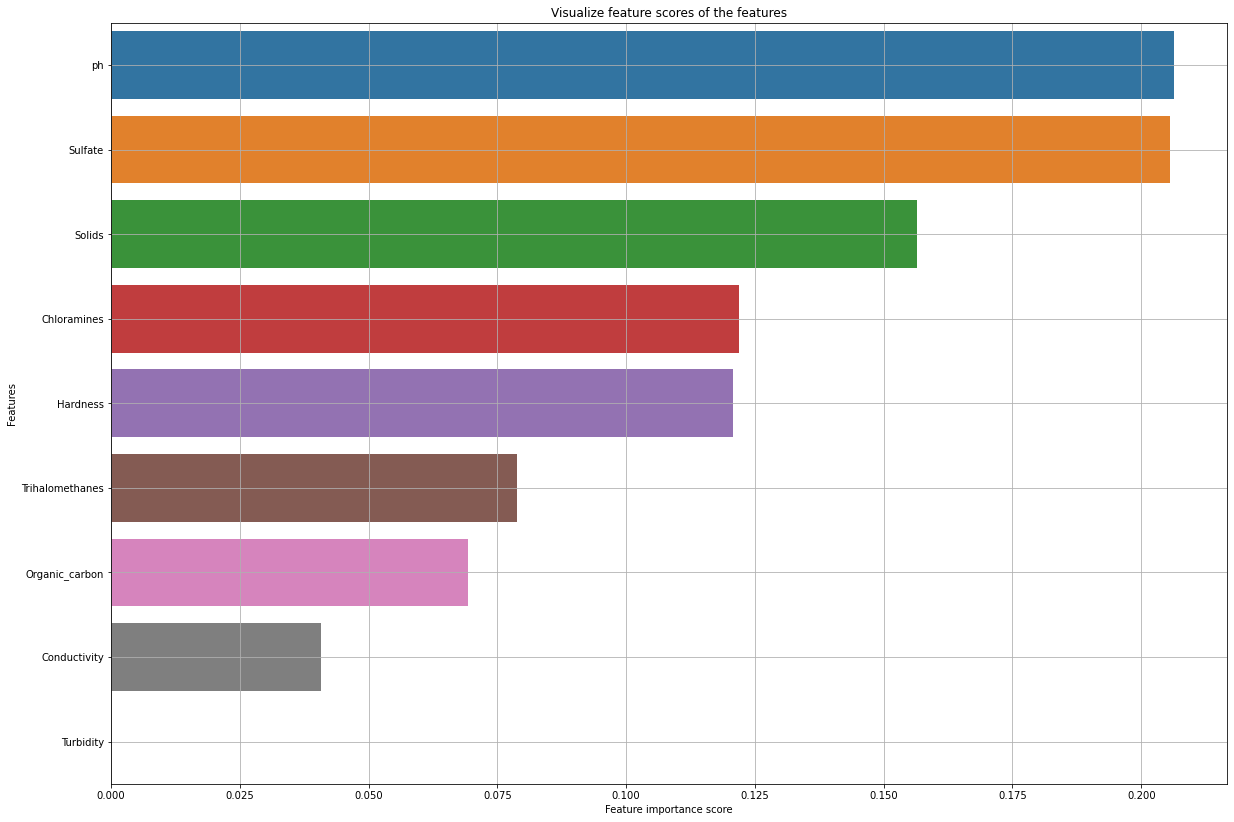

In [32]:
#Using the model that was used above to find the important features. 
find_feature_importance(tree)

From the above graph we can see that **Sulfate, pH and Solids** are the main features that plays an important role in classifying Inpatient/Outpatient care.

Implementing the decision tree by using these three features, ccp_alpha value of 0.003 and tree depth of 7.

In [33]:
#Selecting only the important predictor variables and target variables for the algorithm, 
#with CCP_VALUE = 0.003 and MAX_DEPTH = 7 as obtained above
pred_var = water_data[['Sulfate', 'ph', 'Solids']]
targ_var = water_data['Potability']

# #Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25, random_state=11)

#We know the data for the predictor variables are not under the same ranges, thus scaling/normalization is required.
#Also, we saw that most of the fields has some outliers and are skewed. 
#Thus we will be using the Min Max Normalization process to normalize the data across all the fields.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 
#The max_depth of the tree is not defined, thus allowing the tree to be expanded to all the leaf nodes.
tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", ccp_alpha=0.003, max_depth=7, random_state=9)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

print("\nThe depth of the tree is {}".format(tree.get_depth()))

The accuracy of the training set is 0.6730769230769231
The accuracy of the testing set is 0.6361829025844931

The depth of the tree is 7


The accuracy obtained here with selected feature is as same as that of the earlier. Thus, we can see that by selecting only specific features does not impact much and looks like there is confounding variables which are affecting the prediction. 

The accuracy of the training set is 1.0
The accuracy of the testing set is 0.6878727634194831


The feature importance scores obtained are: 
ph                 0.140798
Sulfate            0.139863
Chloramines        0.119794
Hardness           0.114059
Solids             0.110586
Conductivity       0.094989
Organic_carbon     0.094651
Turbidity          0.092978
Trihalomethanes    0.092282
dtype: float64



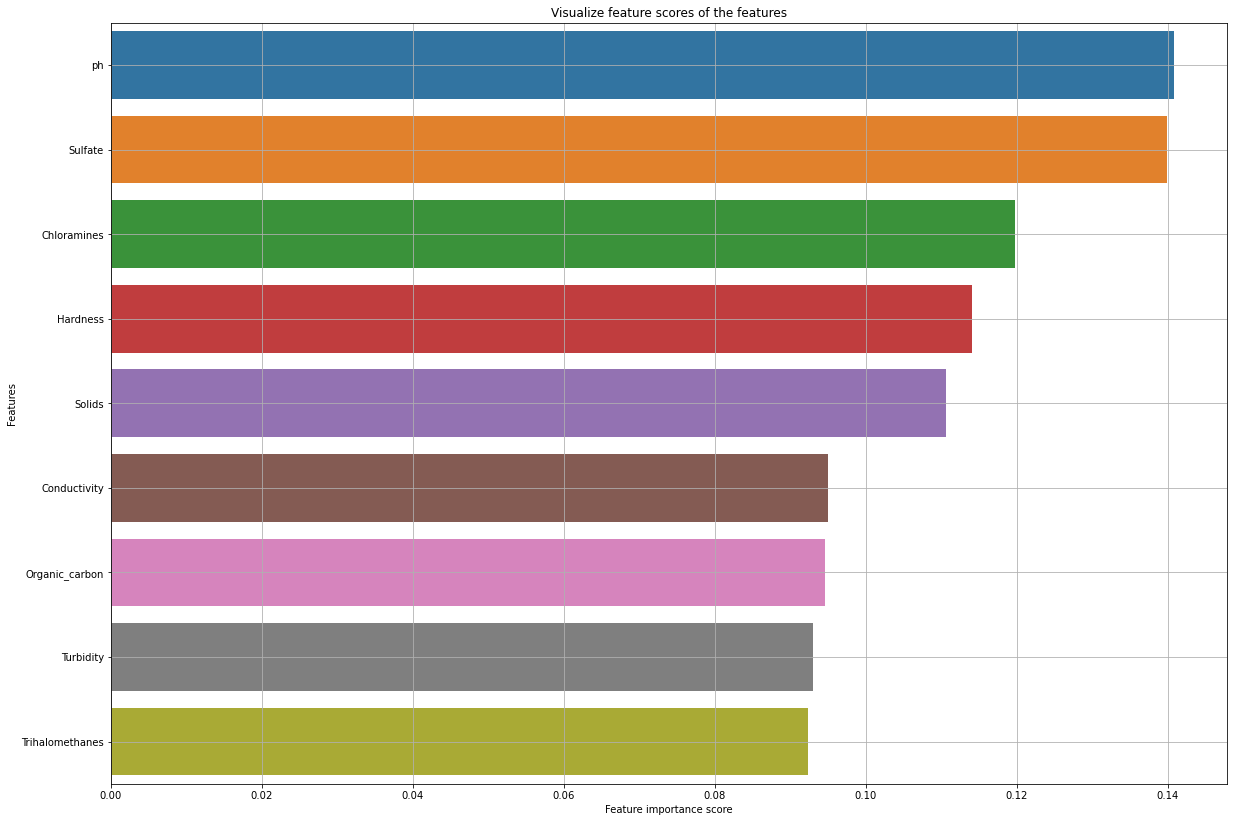

In [35]:
#Implementing Random Forest ensembles to test the accuracy

#Selecting the predictor variables and target variables for the algorithm. 
pred_var = water_data.iloc[:, 0:9]
targ_var = water_data['Potability']

# #Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25)

# #We know the data for the predictor variables are not under the same ranges, thus scaling/normalization is required.
# #Also, we saw that most of the fields has some outliers and are skewed. 
# #Thus we will be using the Min Max Normalization process to normalize the data across all the fields.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf_ensemble = RandomForestClassifier(n_estimators=150, criterion="entropy")
rf_ensemble.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(rf_ensemble.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(rf_ensemble.score(X_test, y_test)))
print("\n")
find_feature_importance(rf_ensemble)

By using the Random Forest ensemble we can see that with providing 100 trees the accuracy of the training data is 100% and testing set is 68%. This is slightly better than the previous accuracy obtained. The random forest ensemble shows us that all of the features have high importance. 

Thus, the best test accuracy score we obtained using the Boosting ensemble is 67.99%  when learning_rate = 0.07


The feature importance scores obtained are: 
ph                 0.256020
Sulfate            0.255250
Chloramines        0.140645
Hardness           0.097907
Solids             0.077976
Organic_carbon     0.050644
Turbidity          0.045302
Conductivity       0.041757
Trihalomethanes    0.034498
dtype: float64



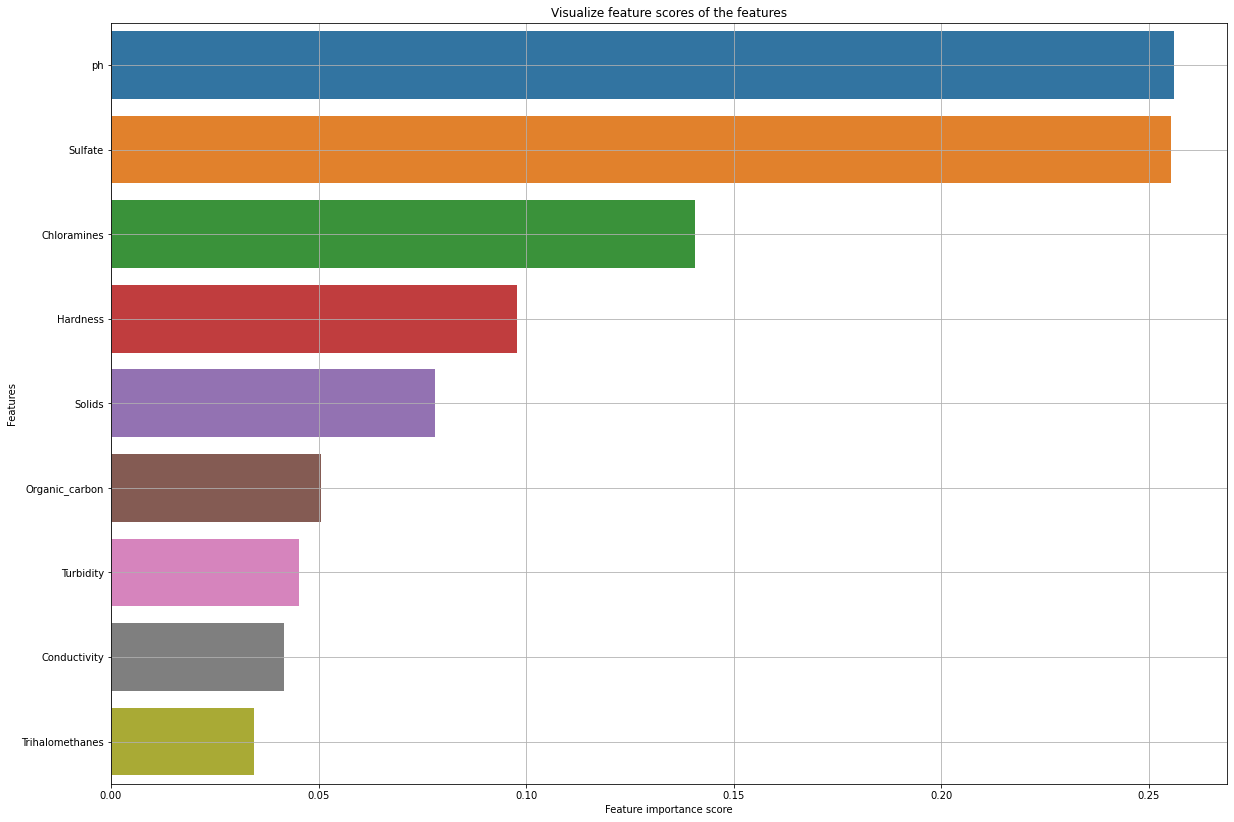

In [36]:
#Implementing the Boosting ensemble for multiple learning_rate to find the optimum learning rate value. 

arr = np.linspace(0.01, 0.1, 10)

test_scores = []
train_scores = []

for i in arr:
    boosting_ensemble = GradientBoostingClassifier(learning_rate=i)
    boosting_ensemble.fit(X_train, y_train)
    
    test_scores.append((boosting_ensemble.score(X_test, y_test), i))
    train_scores.append(boosting_ensemble.score(X_train, y_train))

test_scores.sort(reverse=True)

print("Thus, the best test accuracy score we obtained using the Boosting ensemble is {}% \
 when learning_rate = {}".format(round(test_scores[0][0]*100, 2), test_scores[0][1]))
print("\n")
      
boosting_ensemble = GradientBoostingClassifier(learning_rate=test_scores[0][1])
boosting_ensemble.fit(X_train, y_train)
      
find_feature_importance(boosting_ensemble)

By using the Boosting ensemble we can see that with learning rate of 0.07 provides the accuracy of testing set is 68%. This is similar to the previous accuracy obtained using Random Forest ensemble. The boosting ensemble uses only 2-3 feature as major important features. 

### Conclusion

Thus, from the above implementation of the decision tree we can conclude that high accuracy was not able to be obtained. Prediction accuracy of about 65% in average is obtained with different hyperparameters and ensembles. This is mainly due to the dataset we have is not as well prepared as required and there are lot of noises present in the data. Also, the confounding variables might play a factor which needs to be adjusted. With different implementation of the trees and ensembles we were getting different important features. 

In comparison with the K-NN algorithm, we were not able to find as high accuracy as desired. Thus, K-NN algorithm looks to be a better algorithm in determining the prediction for this dataset.  